## Basic Setting

In [395]:
### 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab의 경우 Runtime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Font directories:
	/root/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/root/.fonts
	/usr/share/fonts/truetype
	/usr/share/fonts/truetype/dejavu
	/usr/share/fonts/truetype/liberation
	/usr/share/fonts/truetype/nanum
/root/.local/share/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/root/.fonts: skipping, no such directory
/usr/shar

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

In [2]:
import pandas as pd
import seaborn as sns

# Persona2 DDA
## 2021년 희귀질환 발생자 수

### 질병분류코드별 연령별 발생자 수 data

In [5]:
df_gender_age_accrual = pd.read_csv('../csv/2021_질병분류코드별_발생자수.csv')
df_gender_age_accrual[:10]

,질병코드 및 질환,성별,발생자수,1세이하,1~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80세 이상,질병코드,질병명
0,계,계,43079,466,799,2272,4196,4344,5345,7072,8618,6602,3365,계,NaN
1,D61.3 특발성 무형성빈혈,계,406,1,14,30,46,36,51,65,74,65,24,D61.3,특발성 무형성빈혈
2,D61.3 특발성 무형성빈혈,남자,186,0,8,17,22,12,26,26,37,30,8,D61.3,특발성 무형성빈혈
3,D61.3 특발성 무형성빈혈,여자,220,1,6,13,24,24,25,39,37,35,16,D61.3,특발성 무형성빈혈
4,D61.9 저형성빈혈 NOS,계,223,0,13,18,18,29,27,31,42,26,19,D61.9,저형성빈혈 NOS
5,D61.9 저형성빈혈 NOS,남자,112,0,5,13,11,12,8,13,19,20,11,D61.9,저형성빈혈 NOS
6,D61.9 저형성빈혈 NOS,여자,111,0,8,5,7,17,19,18,23,6,8,D61.9,저형성빈혈 NOS
7,D68.6 항인지질증후군,계,469,0,0,9,31,98,99,95,66,45,26,D68.6,항인지질증후군
8,D68.6 항인지질증후군,남자,224,0,0,5,15,35,40,57,36,28,8,D68.6,항인지질증후군
9,D68.6 항인지질증후군,여자,245,0,0,4,16,63,59,38,30,17,18,D68.6,항인지질증후군


#### 희귀질환 종류 확인 / 질병 total 52개

In [6]:
rare_disease = df_gender_age_accrual['질병명'][1:]
rare_disease

1                                              특발성 무형성빈혈
2                                              특발성 무형성빈혈
3                                              특발성 무형성빈혈
4                                              저형성빈혈 NOS
5                                              저형성빈혈 NOS
                             ...                        
152                                   신경섬유종증(비악성) 1형, 2형
153                                   신경섬유종증(비악성) 1형, 2형
154    특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된 병태에...
155    특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된 병태에...
156    특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된 병태에...
Name: 질병명, Length: 156, dtype: object

In [7]:
df_rare_disease = pd.DataFrame(rare_disease)
df_rare_disease

,질병명
1,특발성 무형성빈혈
2,특발성 무형성빈혈
3,특발성 무형성빈혈
4,저형성빈혈 NOS
5,저형성빈혈 NOS
...,...
152,"신경섬유종증(비악성) 1형, 2형"
153,"신경섬유종증(비악성) 1형, 2형"
154,"특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된 병태에..."
155,"특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된 병태에..."


In [8]:
df_rare_disease = df_rare_disease.drop_duplicates()
df_rare_disease

,질병명
1,특발성 무형성빈혈
4,저형성빈혈 NOS
7,항인지질증후군
10,폐의 사르코이드증
13,부신피질부전 NOS
16,카다실
19,만기발병 소뇌성 운동실조(발병은 보통 20세 이후)
22,상세불명의 유전성 운동실조
25,"운동신경세포병(단, 기타 및 상세불명의 운동신경세포병(G12.28)은 제외)"
28,진행성 핵상안근마비 [스틸-리차드슨-올스제위스키]


In [9]:
df_rare_disease = df_rare_disease.reset_index()
df_rare_disease

,index,질병명
0,1,특발성 무형성빈혈
1,4,저형성빈혈 NOS
2,7,항인지질증후군
3,10,폐의 사르코이드증
4,13,부신피질부전 NOS
5,16,카다실
6,19,만기발병 소뇌성 운동실조(발병은 보통 20세 이후)
7,22,상세불명의 유전성 운동실조
8,25,"운동신경세포병(단, 기타 및 상세불명의 운동신경세포병(G12.28)은 제외)"
9,28,진행성 핵상안근마비 [스틸-리차드슨-올스제위스키]


In [10]:
# 이상치인가 확인
df_rare_disease.tail(1).values

array([[154,
        '특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된 병태에 따라 KCD 부호를 달리 부여 면역글로블린 G4 관련 질환']],
      dtype=object)

#### 연령/질병분류코드/지역별 data 내 keypoint
- 연령별 발생자 비교
- 질병분류코드별 발생자 비교
- 성별별 최다/최소 발생 질환
- 지역별 발생자 분포 현황
- 발생자 분포 최대 지역(서울특별시)의 질병코드별 발생 정도 비교

##### 1) 연령별 발생자 비교

In [11]:
# 전반적인 발생자수 확인
total_age = df_gender_age_accrual.loc[0][2:-2]
total_age = total_age.rename({'발생자수': 'Total'})
total_age

Total     43079
1세이하        466
1~9세        799
10~19세     2272
20~29세     4196
30~39세     4344
40~49세     5345
50~59세     7072
60~69세     8618
70~79세     6602
80세 이상     3365
Name: 0, dtype: object

In [13]:
# DataFrame 만들어주기
df_age_accural_total = pd.DataFrame(total_age)
df_age_accural_total.columns = ['발생자수']
df_age_accural_total.sort_values('발생자수')

,발생자수
1세이하,466
1~9세,799
10~19세,2272
80세 이상,3365
20~29세,4196
30~39세,4344
40~49세,5345
70~79세,6602
50~59세,7072
60~69세,8618


In [14]:
# Total 제외
total_age02 = df_gender_age_accrual.loc[0][3:-2]
total_age02

1세이하       466
1~9세       799
10~19세    2272
20~29세    4196
30~39세    4344
40~49세    5345
50~59세    7072
60~69세    8618
70~79세    6602
80세 이상    3365
Name: 0, dtype: object

In [15]:
# DataFrame 만들어주기
df_age_accural = pd.DataFrame(total_age02)
df_age_accural.columns = ['발생자수']
df_age_accural.sort_values('발생자수')

,발생자수
1세이하,466
1~9세,799
10~19세,2272
80세 이상,3365
20~29세,4196
30~39세,4344
40~49세,5345
70~79세,6602
50~59세,7072
60~69세,8618


In [16]:
# datatype 변경
df_age_accural['발생자수'] = df_age_accural['발생자수'].astype(int)

In [17]:
# describe() 확인
df_age_accural['발생자수'].describe()

count      10.000000
mean     4307.900000
std      2680.713647
min       466.000000
25%      2545.250000
50%      4270.000000
75%      6287.750000
max      8618.000000
Name: 발생자수, dtype: float64

발생자수 요약
- 연령대별 평균 발생자수 : 4308명
- 표준편차 : 2681명
- 최소 발생자수 연령대 : 466명 1세 이하
- 최대 발생자수 연령대 : 8618명 60-69세

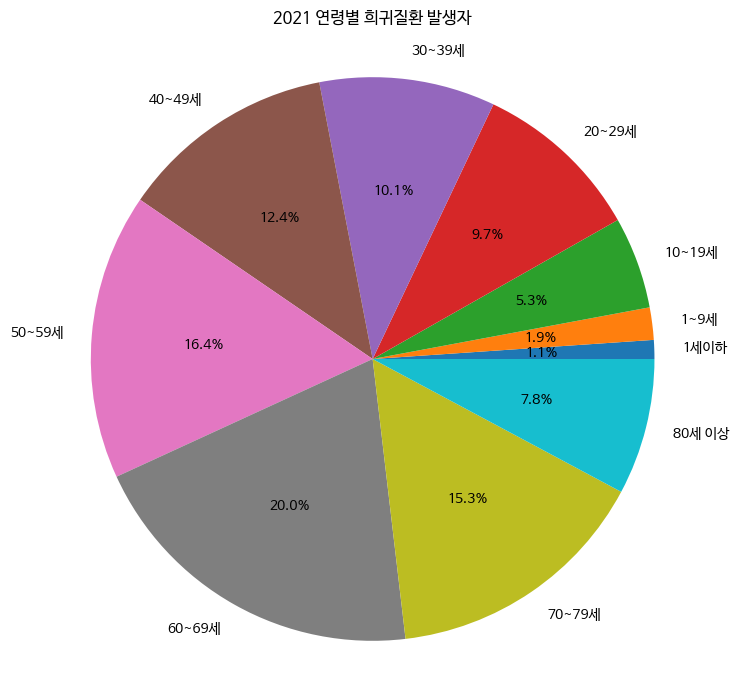

In [18]:
# 파이차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(df_age_accural['발생자수'], labels=df_age_accural.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('2021 연령별 희귀질환 발생자\n')
plt.show()

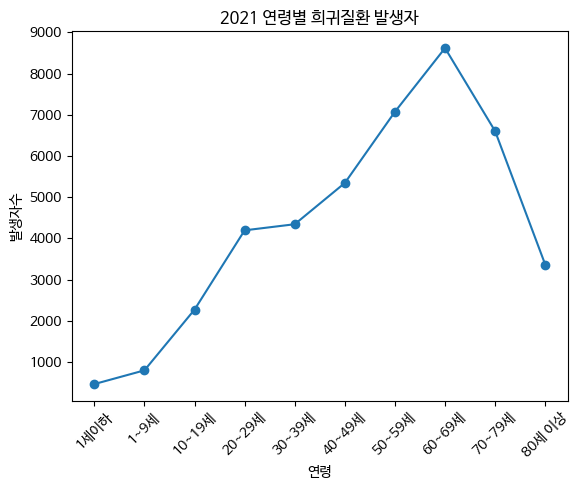

In [19]:
# 선그래프 그리기
plt.plot(df_age_accural.index, df_age_accural['발생자수'], marker='o', linestyle='-')
plt.title('2021 연령별 희귀질환 발생자')
plt.xlabel('연령')
plt.ylabel('발생자수')
plt.xticks(rotation=45)
plt.show()

##### 연령별 발생자 수 비교 결과
- 최다 발생 연령 범위 '60-69'
- 최소 발생 연령 범위 '1세 이하'
- 발생자 수 상위 Rank3 : 60-69, 50-59, 70-79 : 51.7%
- 발생자 수 하위 Rank3 : 1세 이하, 1-9, 10-19 : 8.3%
- 발생자 수 상위 Rank3은 하위 Rank3의 약 "6배"

##### 인구통계 대비 연령별 발생자 수 비교

In [27]:
df_population = pd.read_csv('../csv/2021_질병분류코드별_발생자수.csv')

In [28]:
df_population

,질병코드 및 질환,성별,발생자수,1세이하,1~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80세 이상,질병코드,질병명
0,계,계,43079,466,799,2272,4196,4344,5345,7072,8618,6602,3365,계,NaN
1,D61.3 특발성 무형성빈혈,계,406,1,14,30,46,36,51,65,74,65,24,D61.3,특발성 무형성빈혈
2,D61.3 특발성 무형성빈혈,남자,186,0,8,17,22,12,26,26,37,30,8,D61.3,특발성 무형성빈혈
3,D61.3 특발성 무형성빈혈,여자,220,1,6,13,24,24,25,39,37,35,16,D61.3,특발성 무형성빈혈
4,D61.9 저형성빈혈 NOS,계,223,0,13,18,18,29,27,31,42,26,19,D61.9,저형성빈혈 NOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,"Q85.0 신경섬유종증(비악성) 1형, 2형",남자,146,13,57,21,17,15,7,11,4,1,0,Q85.0,"신경섬유종증(비악성) 1형, 2형"
153,"Q85.0 신경섬유종증(비악성) 1형, 2형",여자,174,20,55,14,28,21,10,17,8,1,0,Q85.0,"신경섬유종증(비악성) 1형, 2형"
154,"질병의 특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된...",계,426,0,0,2,6,15,40,107,150,84,22,질병의,"특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된 병태에..."
155,"질병의 특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된...",남자,302,0,0,1,4,6,31,69,106,67,18,질병의,"특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된 병태에..."


In [30]:
# 질병분류코드별 자료와 범주 동일하게 가공
df_population_total = df_population[df_population['성별'] == '전체']
df_population_total = df_population_total[1:18]
df_population_total

,질병코드 및 질환,성별,발생자수,1세이하,1~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80세 이상,질병코드,질병명


In [300]:
# 연령대별로 합산하여 새로운 DataFrame 생성
new_df_population_total = pd.DataFrame(columns=['성별', '연령별', '2021'])

for i in range(0, len(df_population_total), 2):
    temp_sum = df_population_total.iloc[i:i+2].sum()
    new_df_population_total = pd.concat([new_df_population_total, temp_sum.to_frame().T], ignore_index=True)

print(new_df_population_total)

     성별               연령별     2021
0  전체전체      0 - 4세5 - 9세  3850627
1  전체전체  10 - 14세15 - 19세  4643600
2  전체전체  20 - 24세25 - 29세  6953529
3  전체전체  30 - 34세35 - 39세  6989477
4  전체전체  40 - 44세45 - 49세  8158318
5  전체전체  50 - 54세55 - 59세  8539374
6  전체전체  60 - 64세65 - 69세  6959660
7  전체전체  70 - 74세75 - 79세  3657969
8    전체             80세이상  2016985


In [301]:
new_df_population_total = new_df_population_total.drop(labels='성별',axis=1)
new_df_population_total

,연령별,2021
0,0 - 4세5 - 9세,3850627
1,10 - 14세15 - 19세,4643600
2,20 - 24세25 - 29세,6953529
3,30 - 34세35 - 39세,6989477
4,40 - 44세45 - 49세,8158318
5,50 - 54세55 - 59세,8539374
6,60 - 64세65 - 69세,6959660
7,70 - 74세75 - 79세,3657969
8,80세이상,2016985


In [302]:
# 해당 두 행을 합쳐서 새로운 행으로 추가
total_1_and_under = df_age_accural.at['1세이하', '발생자수'] + df_age_accural.at['1~9세', '발생자수']
new_row = pd.DataFrame({'발생자수': [total_1_and_under]}, index=['0-9세'])

# 기존 행 삭제
df_age_accural = df_age_accural.drop(['1세이하', '1~9세'])

# 새로운 행을 첫 번째 위치에 추가
df_age_accural = pd.concat([new_row, df_age_accural])

df_age_accural = df_age_accural.reset_index()
df_age_accural = df_age_accural.rename(columns={'index': '연령별'})  # 인덱스의 이름을 변경하고 싶은 경우

df_age_accural

,연령별,발생자수
0,0-9세,1265
1,10~19세,2272
2,20~29세,4196
3,30~39세,4344
4,40~49세,5345
5,50~59세,7072
6,60~69세,8618
7,70~79세,6602
8,80세 이상,3365


In [303]:
population_accural = pd.concat([new_df_population_total, df_age_accural], axis=1)
population_accural

,연령별,2021,연령별,발생자수
0,0 - 4세5 - 9세,3850627,0-9세,1265
1,10 - 14세15 - 19세,4643600,10~19세,2272
2,20 - 24세25 - 29세,6953529,20~29세,4196
3,30 - 34세35 - 39세,6989477,30~39세,4344
4,40 - 44세45 - 49세,8158318,40~49세,5345
5,50 - 54세55 - 59세,8539374,50~59세,7072
6,60 - 64세65 - 69세,6959660,60~69세,8618
7,70 - 74세75 - 79세,3657969,70~79세,6602
8,80세이상,2016985,80세 이상,3365


In [304]:
# 전체인구대비 발생자수 비율 계산 (소수점 두 자리까지)
population_accural['발생자수 비율(%)'] = ((population_accural['발생자수'] / population_accural['2021']) * 100).round(2)

population_accural

,연령별,2021,연령별,발생자수,발생자수 비율(%)
0,0 - 4세5 - 9세,3850627,0-9세,1265,0.032852
1,10 - 14세15 - 19세,4643600,10~19세,2272,0.048928
2,20 - 24세25 - 29세,6953529,20~29세,4196,0.060343
3,30 - 34세35 - 39세,6989477,30~39세,4344,0.062151
4,40 - 44세45 - 49세,8158318,40~49세,5345,0.065516
5,50 - 54세55 - 59세,8539374,50~59세,7072,0.082816
6,60 - 64세65 - 69세,6959660,60~69세,8618,0.123828
7,70 - 74세75 - 79세,3657969,70~79세,6602,0.180483
8,80세이상,2016985,80세 이상,3365,0.166833


In [305]:
new_df_population_total.at[0, '연령별'] = '0-9세'
new_df_population_total.at[1, '연령별'] = '10-19세'
new_df_population_total.at[2, '연령별'] = '20-29세'
new_df_population_total.at[3, '연령별'] = '30-39세'
new_df_population_total.at[4, '연령별'] = '40-49세'
new_df_population_total.at[5, '연령별'] = '50-59세'
new_df_population_total.at[6, '연령별'] = '60-69세'
new_df_population_total.at[7, '연령별'] = '70-79세'
new_df_population_total

,연령별,2021
0,0-9세,3850627
1,10-19세,4643600
2,20-29세,6953529
3,30-39세,6989477
4,40-49세,8158318
5,50-59세,8539374
6,60-69세,6959660
7,70-79세,3657969
8,80세이상,2016985


In [574]:
population_accural = population_accural[['연령별', '2021', '발생자수', '발생자수 비율(%)']]
population_accural = population_accural.iloc[:, 1:]
population_accural = population_accural.sort_values(by='발생자수 비율(%)', ascending=False)

population_accural

,연령별,2021,발생자수,발생자수 비율(%)
0,0-9세,3850627,1265,0.032852
1,10~19세,4643600,2272,0.048928
8,80세 이상,2016985,3365,0.166833
2,20~29세,6953529,4196,0.060343
3,30~39세,6989477,4344,0.062151
4,40~49세,8158318,5345,0.065516
7,70~79세,3657969,6602,0.180483
5,50~59세,8539374,7072,0.082816
6,60~69세,6959660,8618,0.123828


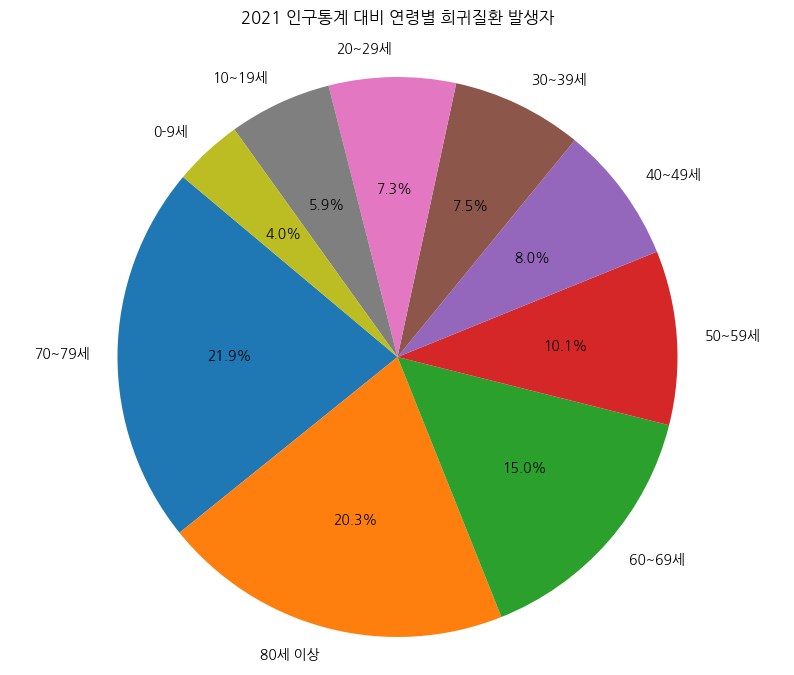

In [582]:
# 파이차트를 위한 데이터 추출
labels = population_accural['연령별']
sizes = population_accural['발생자수 비율(%)'] * 100  # 비율을 퍼센트로 변환

# 파이차트 그리기
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('2021 인구통계 대비 연령별 희귀질환 발생자\n')
plt.show()

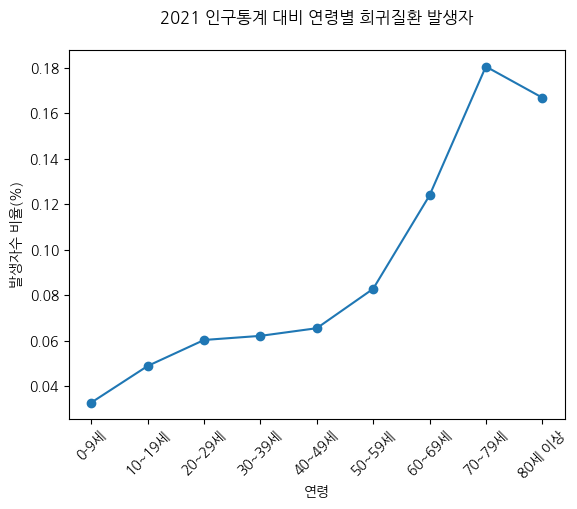

In [585]:
# 발생자수를 내림차순으로 정렬
population_accural_sorted = population_accural.sort_values(by='연령별', ascending=True)

# 선그래프 그리기
plt.plot(population_accural_sorted['연령별'], population_accural_sorted['발생자수 비율(%)'], marker='o', linestyle='-')
plt.title('2021 인구통계 대비 연령별 희귀질환 발생자\n')
plt.xlabel('연령')
plt.ylabel('발생자수 비율(%)')
plt.xticks(rotation=45)
plt.show()

##### 인구통계 대비 연령별 발생자 수 비율 비교 결과
- 최다 발생 연령 범위 '70-79세'
- 최소 발생 연령 범위 '0-9세'
- 발생자 수 상위 Rank3 : 70-79세, 80세 이상, 60-69세 : 약 0.46%
- 발생자 수 하위 Rank3 : 0-9세, 10-19세, 20-29세 : 약 0.13%
- 발생자 수 상위 Rank3은 하위 Rank3의 약 "3~3.5배"

##### 2) 질병분류코드별 발생자 비교

In [307]:
df_gender_age_accrual

,질병코드 및 질환,성별,발생자수,1세이하,1~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80세 이상,질병코드,질병명
0,계,계,43079,466,799,2272,4196,4344,5345,7072,8618,6602,3365,계,NaN
1,D61.3 특발성 무형성빈혈,계,406,1,14,30,46,36,51,65,74,65,24,D61.3,특발성 무형성빈혈
2,D61.3 특발성 무형성빈혈,남자,186,0,8,17,22,12,26,26,37,30,8,D61.3,특발성 무형성빈혈
3,D61.3 특발성 무형성빈혈,여자,220,1,6,13,24,24,25,39,37,35,16,D61.3,특발성 무형성빈혈
4,D61.9 저형성빈혈 NOS,계,223,0,13,18,18,29,27,31,42,26,19,D61.9,저형성빈혈 NOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,"Q85.0 신경섬유종증(비악성) 1형, 2형",남자,146,13,57,21,17,15,7,11,4,1,0,Q85.0,"신경섬유종증(비악성) 1형, 2형"
153,"Q85.0 신경섬유종증(비악성) 1형, 2형",여자,174,20,55,14,28,21,10,17,8,1,0,Q85.0,"신경섬유종증(비악성) 1형, 2형"
154,"질병의 특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된...",계,426,0,0,2,6,15,40,107,150,84,22,질병의,"특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된 병태에..."
155,"질병의 특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된...",남자,302,0,0,1,4,6,31,69,106,67,18,질병의,"특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된 병태에..."


In [308]:
# 필요한 column만 추출 (질병명, 성별, 발생자수)
df_total_gender_accrual = df_gender_age_accrual[['질병명', '성별', '발생자수']][1:]
df_total_gender_accrual

,질병명,성별,발생자수
1,특발성 무형성빈혈,계,406
2,특발성 무형성빈혈,남자,186
3,특발성 무형성빈혈,여자,220
4,저형성빈혈 NOS,계,223
5,저형성빈혈 NOS,남자,112
...,...,...,...
152,"신경섬유종증(비악성) 1형, 2형",남자,146
153,"신경섬유종증(비악성) 1형, 2형",여자,174
154,"특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된 병태에...",계,426
155,"특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된 병태에...",남자,302


In [309]:
# 성별 합계 data만 추출
total_accrual = df_total_gender_accrual.loc[df_total_gender_accrual['성별'] == "계"]
total_accrual.reset_index()
total_accrual

,질병명,성별,발생자수
1,특발성 무형성빈혈,계,406
4,저형성빈혈 NOS,계,223
7,항인지질증후군,계,469
10,폐의 사르코이드증,계,319
13,부신피질부전 NOS,계,618
16,카다실,계,276
19,만기발병 소뇌성 운동실조(발병은 보통 20세 이후),계,440
22,상세불명의 유전성 운동실조,계,269
25,"운동신경세포병(단, 기타 및 상세불명의 운동신경세포병(G12.28)은 제외)",계,889
28,진행성 핵상안근마비 [스틸-리차드슨-올스제위스키],계,242


In [310]:
total_accrual['발생자수'] = total_accrual['발생자수'].astype(int)

/tmp/ipykernel_373/2946409883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_accrual['발생자수'] = total_accrual['발생자수'].astype(int)


In [311]:
# total_accrual['질병명'][154] 값을 수정
total_accrual.at[154, '질병명'] = 'G4 관련 질환'
total_accrual

,질병명,성별,발생자수
1,특발성 무형성빈혈,계,406
4,저형성빈혈 NOS,계,223
7,항인지질증후군,계,469
10,폐의 사르코이드증,계,319
13,부신피질부전 NOS,계,618
16,카다실,계,276
19,만기발병 소뇌성 운동실조(발병은 보통 20세 이후),계,440
22,상세불명의 유전성 운동실조,계,269
25,"운동신경세포병(단, 기타 및 상세불명의 운동신경세포병(G12.28)은 제외)",계,889
28,진행성 핵상안근마비 [스틸-리차드슨-올스제위스키],계,242


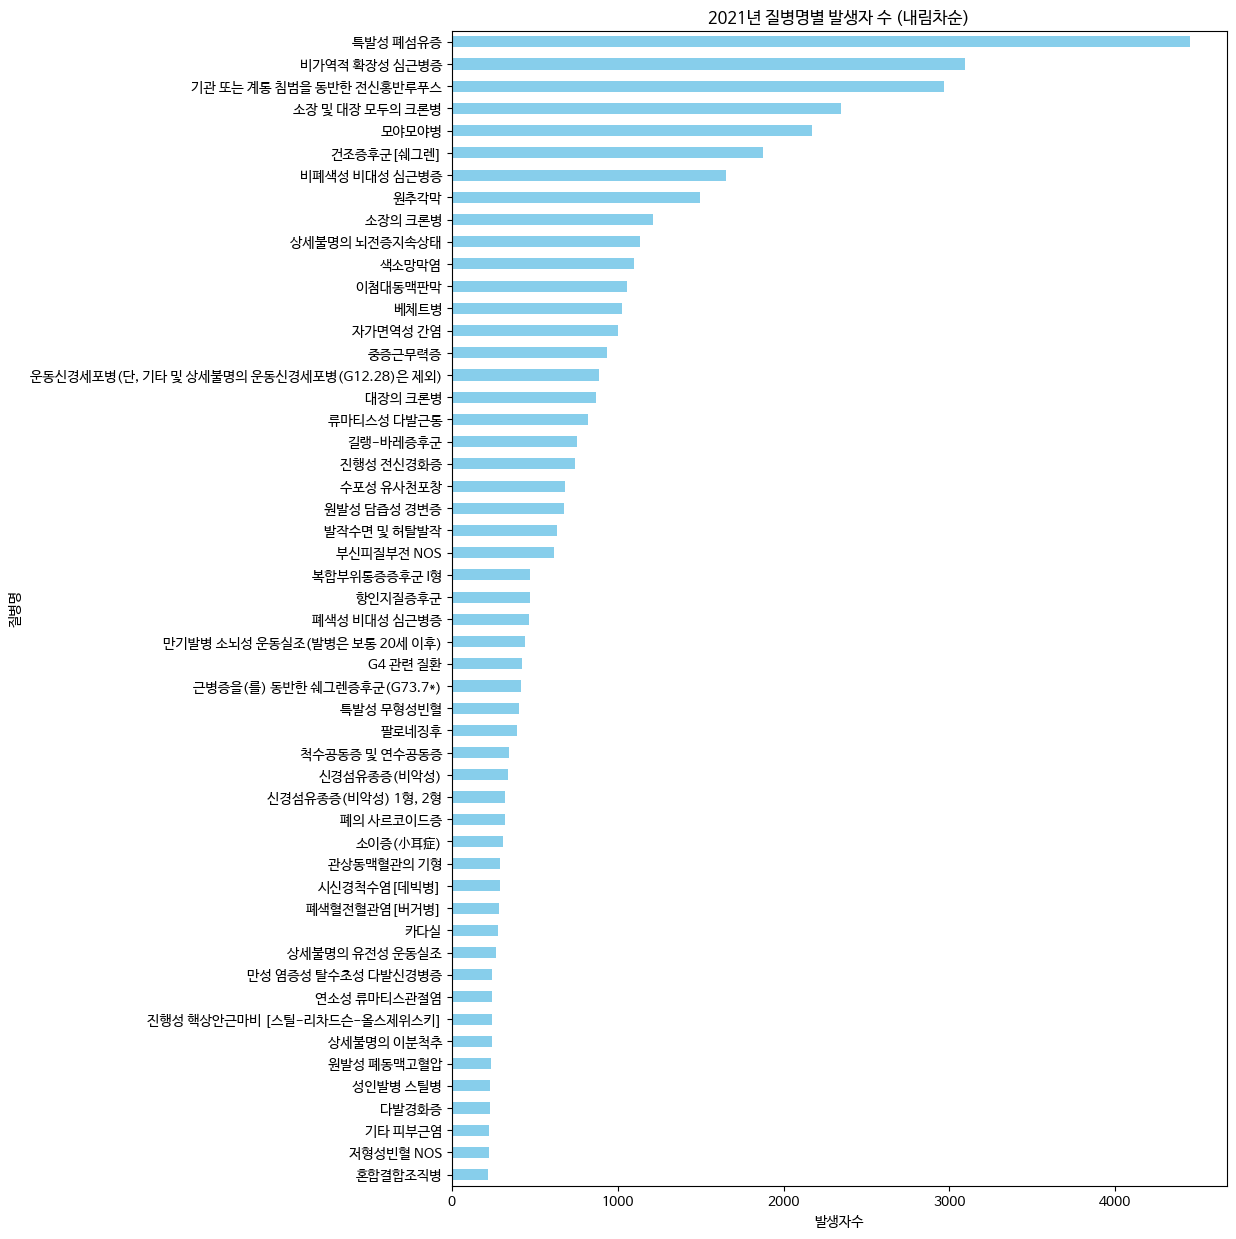

In [312]:
# 데이터프레임을 막대의 길이에 따라 내림차순으로 정렬
sorted_df = total_accrual.sort_values(by='발생자수', ascending=True)

# 수평 막대 그래프 그리기
ax = sorted_df.plot.barh(x='질병명', y='발생자수', figsize=(10, 15), legend=None, color='skyblue')  # x와 y의 위치를 바꿔서 수평 막대 그래프를 생성합니다.
ax.set_title('2021년 질병명별 발생자 수 (내림차순)')  # 제목 지정
ax.set_xlabel('발생자수')  # x축 레이블 지정
ax.set_ylabel('질병명')  # y축 레이블 지정
plt.show()

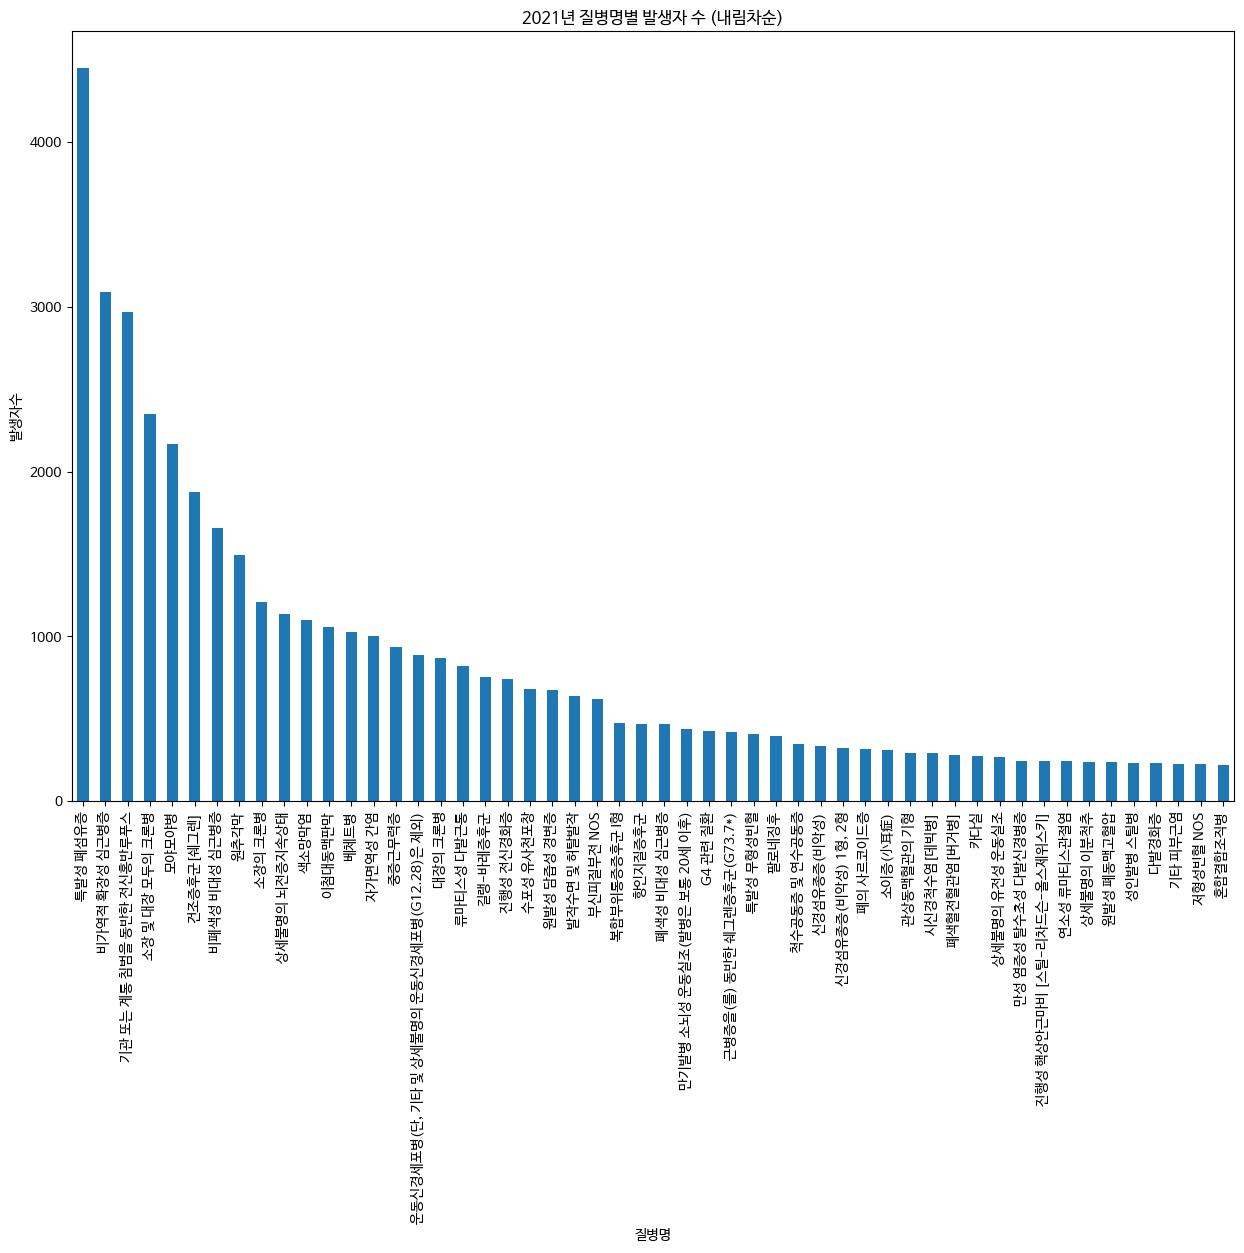

In [313]:
# 데이터프레임을 막대의 길이에 따라 내림차순으로 정렬
sorted_df = total_accrual.sort_values(by='발생자수', ascending=False)

# 막대 그래프 그리기
sorted_df.plot.bar(x='질병명', y='발생자수', figsize=(15, 10), legend=None)
plt.title('2021년 질병명별 발생자 수 (내림차순)')
plt.xlabel('질병명')
plt.ylabel('발생자수')
plt.show()

In [314]:
most_disease = sorted_df[:8]
most_disease

,질병명,성별,발생자수
82,특발성 폐섬유증,계,4450
67,비가역적 확장성 심근병증,계,3092
109,기관 또는 계통 침범을 동반한 전신홍반루푸스,계,2967
91,소장 및 대장 모두의 크론병,계,2347
76,모야모야병,계,2169
118,건조증후군[쉐그렌],계,1876
73,비폐색성 비대성 심근병증,계,1656
58,원추각막,계,1495


##### 질병분류코드별 발생자 비교
- 막대그래프 상 뚜렷하게 다른 질병코드보다 많이 발생하는 질병코드 그룹(그룹내 질병코드 8개) 존재
  + J84.1 특발성 폐섬유증
  + I42.0 비가역적 확장성 심근병증
  + M32.1 기관 또는 계통 침범을 동반한 전신홍반루푸스
  + K50.8 소장 및 대장 모두의 크론병
  + I67.5 모야모야병
  + M35.0 건조증후군[쉐그렌]
  + I42.20 비폐색성 비대성 심근병증
  + H18.6 원추각막
- 그룹을 나눈다면 3개 그룹으로 크게 나눌 수 있을듯
- 추가 논의 필요한 부분
  + 상위 질병코드 그룹(8개 질병코드) 내 환자들에게 필요한 서비스는 무엇인가?
  + 이 질병들이 소비하는 의료비용이 더 클 것인가, 적은 수의 발생자가 포함된 질병군이 의료비용 소비가 더 클 것인가 확인 필요

##### 3) 성별별 최다/최소 발생 질환

###### 남자

In [315]:
# 남자만 추출
df_man = df_gender_age_accrual[df_gender_age_accrual['성별'] == '남자']

In [316]:
man_summary = df_man[['질병코드 및 질환', '발생자수']]
man_summary

,질병코드 및 질환,발생자수
2,D61.3 특발성 무형성빈혈,186
5,D61.9 저형성빈혈 NOS,112
8,D68.6 항인지질증후군,224
11,D86.0 폐의 사르코이드증,159
14,E27.4 부신피질부전 NOS,214
17,F01.1 카다실,125
20,G11.2 만기발병 소뇌성 운동실조(발병은 보통 20세 이후),236
23,G11.9 상세불명의 유전성 운동실조,137
26,"G12.2 운동신경세포병(단, 기타 및 상세불명의 운동신경세포병(G12.28)은 제외)",533
29,G23.1 진행성 핵상안근마비 [스틸-리차드슨-올스제위스키],150


In [317]:
man_summary['발생자수'] = man_summary['발생자수'].astype(int)

/tmp/ipykernel_373/1671331595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  man_summary['발생자수'] = man_summary['발생자수'].astype(int)


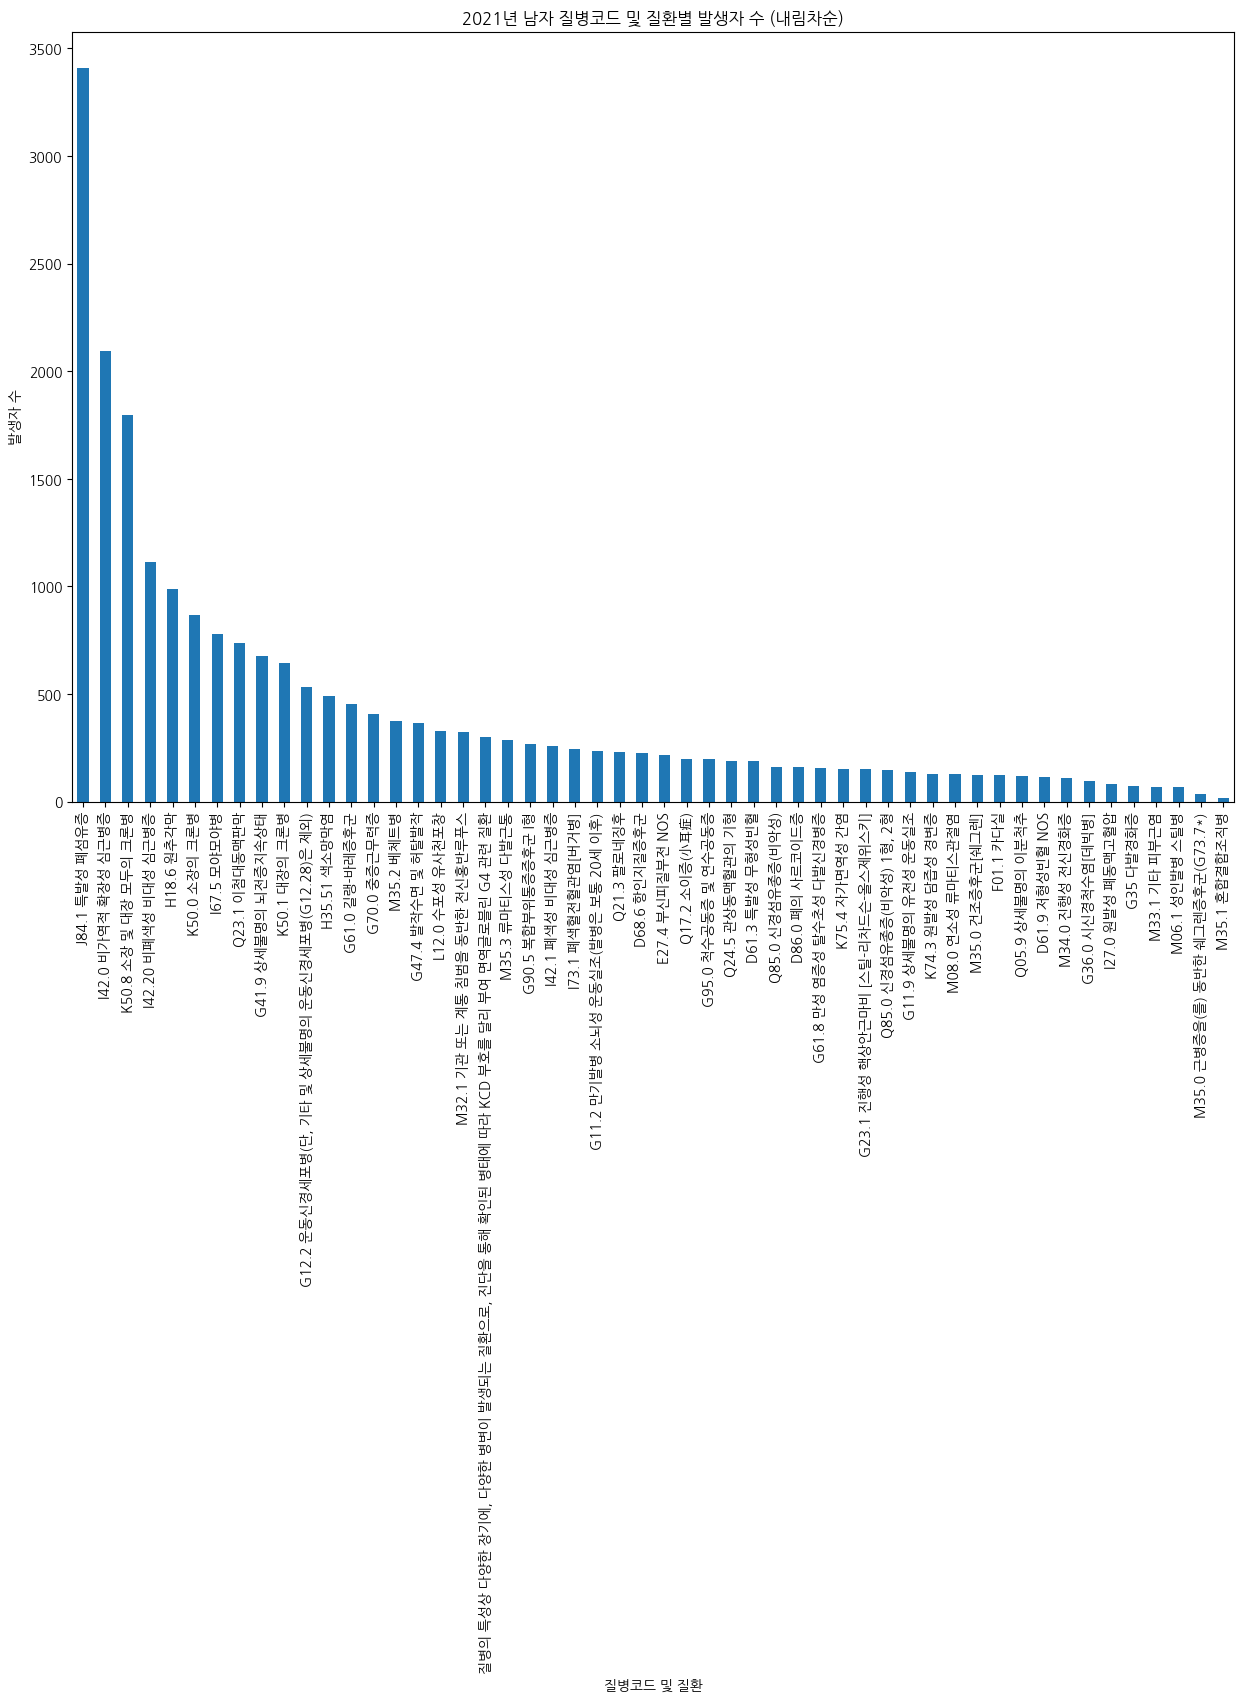

In [589]:
# 데이터프레임을 막대의 길이에 따라 내림차순으로 정렬
sorted_df_man = man_summary.sort_values(by='발생자수', ascending=False)

# 막대 그래프 그리기
sorted_df_man.plot.bar(x='질병코드 및 질환', y='발생자수', figsize=(15, 10), legend=None)
plt.title('2021년 남자 질병코드 및 질환별 발생자 수 (내림차순)')
plt.xlabel('질병코드 및 질환')
plt.ylabel('발생자 수')
plt.show()

In [319]:
sorted_df_man[:3]

,질병코드 및 질환,발생자수
83,J84.1 특발성 폐섬유증,3408
68,I42.0 비가역적 확장성 심근병증,2094
92,K50.8 소장 및 대장 모두의 크론병,1797


###### 남자
- 상위 3개 질병코드 및 질환
  + J84.1 특발성 폐섬유증	3408
  + I42.0 비가역적 확장성 심근병증	2094
  + K50.8 소장 및 대장 모두의 크론병	1797

###### 여자

In [320]:
# 여자만 추출
df_woman = df_gender_age_accrual[df_gender_age_accrual['성별'] == '여자']

In [321]:
woman_summary = df_woman[['질병코드 및 질환', '발생자수']]
woman_summary

,질병코드 및 질환,발생자수
3,D61.3 특발성 무형성빈혈,220
6,D61.9 저형성빈혈 NOS,111
9,D68.6 항인지질증후군,245
12,D86.0 폐의 사르코이드증,160
15,E27.4 부신피질부전 NOS,404
18,F01.1 카다실,151
21,G11.2 만기발병 소뇌성 운동실조(발병은 보통 20세 이후),204
24,G11.9 상세불명의 유전성 운동실조,132
27,"G12.2 운동신경세포병(단, 기타 및 상세불명의 운동신경세포병(G12.28)은 제외)",356
30,G23.1 진행성 핵상안근마비 [스틸-리차드슨-올스제위스키],92


In [322]:
woman_summary['발생자수'] = woman_summary['발생자수'].astype(int)

/tmp/ipykernel_373/4228441689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  woman_summary['발생자수'] = woman_summary['발생자수'].astype(int)


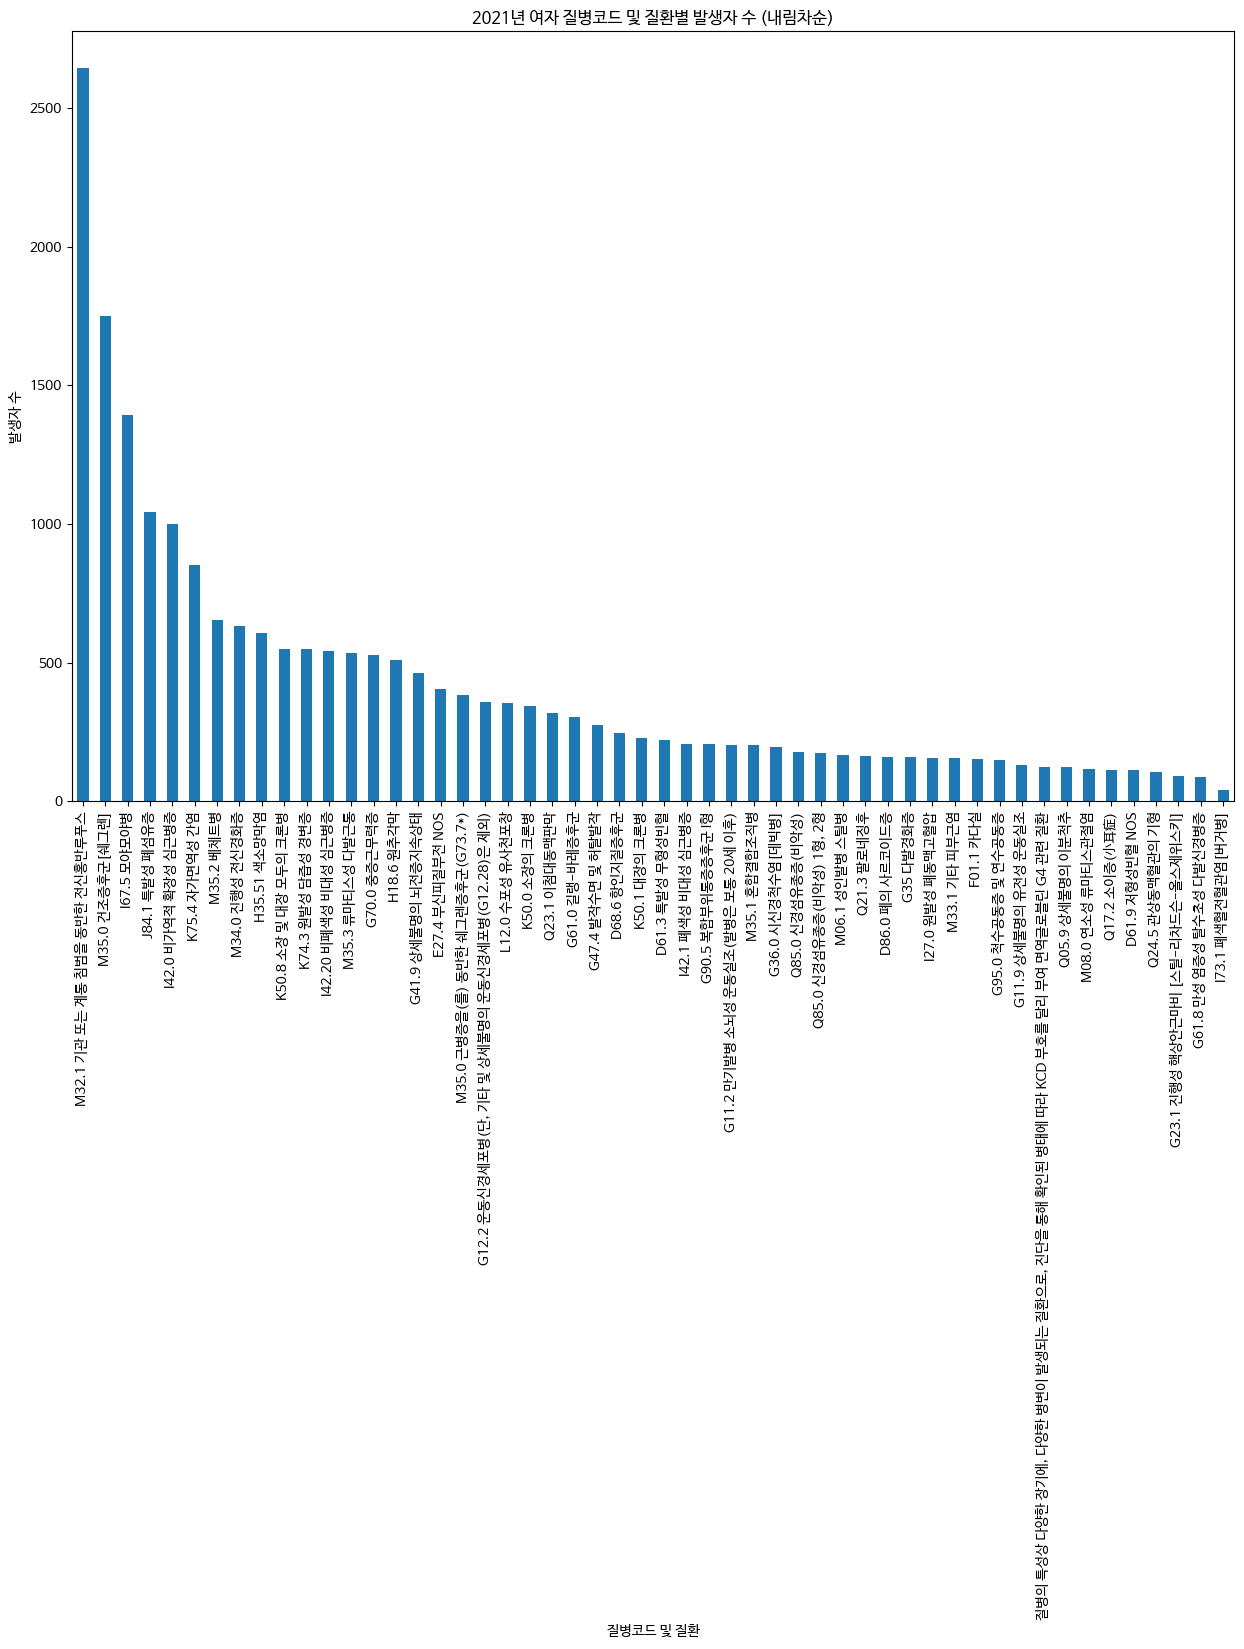

In [323]:
# 데이터프레임을 막대의 길이에 따라 내림차순으로 정렬
sorted_df_woman = woman_summary.sort_values(by='발생자수', ascending=False)

# 막대 그래프 그리기
sorted_df_woman.plot.bar(x='질병코드 및 질환', y='발생자수', figsize=(15, 10), legend=None)
plt.title('2021년 여자 질병코드 및 질환별 발생자 수 (내림차순)')
plt.xlabel('질병코드 및 질환')
plt.ylabel('발생자 수')
plt.show()

In [324]:
sorted_df_woman[:3]

,질병코드 및 질환,발생자수
111,M32.1 기관 또는 계통 침범을 동반한 전신홍반루푸스,2644
120,M35.0 건조증후군[쉐그렌],1751
78,I67.5 모야모야병,1392


###### 여자
- 상위 3개 질병코드 및 질환
  + M32.1 기관 또는 계통 침범을 동반한 전신홍반루푸스	2644
  + M35.0 건조증후군[쉐그렌]	1751
  + I67.5 모야모야병	1392

###### 남자/여자 성별별 total 발생자수 확인

In [325]:
man_sum = man_summary['발생자수'].sum()
man_sum

21742

In [326]:
woman_sum = woman_summary['발생자수'].sum()
woman_sum

21337

###### 남자/여자 인구통계대비 성별별 total 발생자수 확인

In [327]:
df_total_population = pd.read_csv('../../New_csv(데이터전처리 완료된 csv)/2021_대한민국_성_및_연령별_인구통계.csv')
df_total_population

,성별,연령별,2021
0,전체,계,51769539
1,전체,0 - 4세,1618830
2,전체,5 - 9세,2231797
3,전체,10 - 14세,2297714
4,전체,15 - 19세,2345886
...,...,...,...
64,여자,80 - 84세,719722
65,여자,85 - 89세,421203
66,여자,90 - 94세,158017
67,여자,95 - 99세,35223


In [328]:
# 남자 인구통계 대비 발생자수 비교
df_total_population_man = df_total_population[df_total_population['성별'] == '남자']
df_total_population_man = df_total_population_man[:1]
df_total_population_man['발생자수'] = man_sum
df_total_population_man

,성별,연령별,2021,발생자수
23,남자,계,25870941,21742


In [329]:
df_total_population_man['전체 대비 발생자 수 비율(%)'] =  ((df_total_population_man['발생자수'] / df_total_population_man['2021']) * 100).round(2)

df_total_population_man

,성별,연령별,2021,발생자수,전체 대비 발생자 수 비율(%)
23,남자,계,25870941,21742,0.08


In [330]:
# 여자 인구통계 대비 발생자수 비교
df_total_population_woman = df_total_population[df_total_population['성별'] == '여자']
df_total_population_woman = df_total_population_woman[:1]
df_total_population_woman['발생자수'] = woman_sum
df_total_population_woman

,성별,연령별,2021,발생자수
46,여자,계,25898598,21337


In [331]:
df_total_population_woman['전체 대비 발생자 수 비율(%)'] =  ((df_total_population_woman['발생자수'] / df_total_population_woman['2021']) * 100).round(2)

df_total_population_woman

,성별,연령별,2021,발생자수,전체 대비 발생자 수 비율(%)
46,여자,계,25898598,21337,0.08


##### 성별별 최다/최소 발생 질환
- 남자와 여자 상위 3개 질병코드 및 질환이 안 겹침
- 질병분류코드별 발생자 비교 상위 8개 중 남자 상위 3개와 여자 상위 3개가 각각 존재
- 남자 상위 3개 질병분류코드 발생자 7,299 명
- 여자 상위 3개 질병분류코드 발생자 5,787 명
- 성별별 total 발생자수 (남자 : 21,742명, 여자 21,337명)
- 인구통계 대비 성별별 발생자수 비교 (남자 : 0.08%, 여자 0.08%)
- 성별별 전체 발생자수의 차이는 거의 없고, 전체 인구 대비 성별별 발생자수 비율도 별 차이가 없음.
- 상위 3개 질병분류코드에서 차이를 보이는 것으로 보아 남자 발생자가 상위 특정 질병분류코드에 집중적으로 몰려있음을 확인

### 질병분류코드별 지역별 발생자 수 data

In [417]:
df_region_accrual = pd.read_csv('../csv/2021_지역별_질병분류코드별_발생자수.csv')
df_region_accrual[:10]

,질병코드,질병명,발생자 수,서울특별시,인천광역시,경기도,강원도,충청남도,충청북도,대전광역시,...,경상남도,경상북도,부산광역시,대구광역시,울산광역시,전라북도,전라남도,광주광역시,제주특별자치도,알수없음
0,계,NaN,43079,8601,2446,11377,1274,1752,1291,1080,...,2431,2243,2762,2120,789,1501,1392,1076,690,16
1,D61.3,특발성 무형성빈혈,406,73,29,101,20,17,9,12,...,24,19,15,22,6,6,20,20,9,1
2,D61.9,저형성빈혈 NOS,223,47,34,56,4,9,2,1,...,21,7,15,11,4,6,2,1,1,0
3,D68.6,항인지질증후군,469,126,27,121,12,20,3,10,...,11,30,13,37,4,13,13,14,14,0
4,D86.0,폐의 사르코이드증,319,79,24,96,5,14,10,4,...,11,12,15,13,5,6,12,9,3,0
5,E27.4,부신피질부전 NOS,618,75,81,90,9,67,15,16,...,42,48,56,27,35,15,18,10,11,0
6,F01.1,카다실,276,43,6,43,2,7,1,4,...,8,12,17,15,16,6,2,0,90,0
7,G11.2,만기발병 소뇌성 운동실조(발병은 보통 20세 이후),440,62,22,103,3,15,22,12,...,41,33,27,26,10,14,20,19,7,0
8,G11.9,상세불명의 유전성 운동실조,269,89,14,74,5,11,10,2,...,6,7,9,12,4,8,6,11,1,0
9,G12.2,"운동신경세포병(단, 기타 및 상세불명의 운동신경세포병(G12.28)은 제외)",889,171,44,216,31,45,25,20,...,53,52,68,43,16,44,24,17,14,0


##### 4) 지역별 발생자 분포 현황

In [418]:
region_total_accrual = df_region_accrual.iloc[0]
region_total_accrual = region_total_accrual.rename({'발생자 수': '전지역'})

In [419]:
df_region_total_accrual = pd.DataFrame(region_total_accrual)[2:]
df_region_total_accrual.columns = ['발생자수']
df_region_total_accrual

,발생자수
전지역,43079
서울특별시,8601
인천광역시,2446
경기도,11377
강원도,1274
충청남도,1752
충청북도,1291
대전광역시,1080
세종특별자치시,238
경상남도,2431


In [420]:
df_region = df_region_total_accrual[1:]

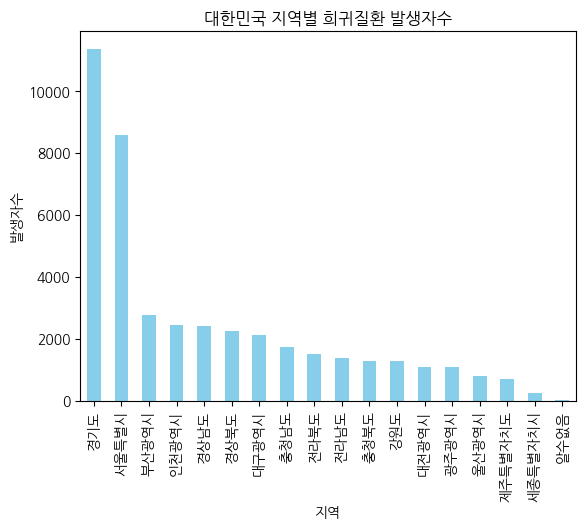

In [421]:
# 발생자수를 기준으로 내림차순 정렬
df_sorted = df_region.sort_values(by='발생자수', ascending=False)

# 지역별로 희귀질환 발생자수 데이터 시각화
df_sorted.plot(kind='bar', color='skyblue', legend=False)
plt.title('대한민국 지역별 희귀질환 발생자수')
plt.xlabel('지역')
plt.ylabel('발생자수')
plt.show()

In [422]:
# 지역별 인구통계 대비 발생자수 비율 비교
df_region_population = pd.read_csv('../../New_csv(데이터전처리 완료된 csv)/2021_대한민국_인구통계.csv')
df_region_population = df_region_population[['행정구역', '지역구', '소계']]
df_region_population = df_region_population[df_region_population['지역구'] == '소계']
df_region_population = df_region_population[1:]
df_region_population = df_region_population.sort_values(by='행정구역', ascending=True)
df_region_population.reset_index()

,index,행정구역,지역구,소계
0,116,강원도,소계,1538492
1,84,경기도,소계,13565450
2,225,경상남도,소계,3314183
3,201,경상북도,소계,2626609
4,64,광주광역시,소계,1441611
5,44,대구광역시,소계,2385412
6,70,대전광역시,소계,1452251
7,27,부산광역시,소계,3350380
8,1,서울특별시,소계,9509458
9,82,세종특별자치시,소계,371895


In [423]:
df_region_total_accrual = df_region_total_accrual.reset_index()
df_region_total_accrual = df_region_total_accrual.rename(columns={'index': '행정구역'})  # 인덱스의 이름을 변경하고 싶은 경우
df_region_total_accrual = df_region_total_accrual[:-1]
df_region_total_accrual = df_region_total_accrual[1:]
df_region_total_accrual = df_region_total_accrual.sort_values(by='행정구역', ascending=True)
df_region_total_accrual.reset_index()

,index,행정구역,발생자수
0,4,강원도,1274
1,3,경기도,11377
2,9,경상남도,2431
3,10,경상북도,2243
4,16,광주광역시,1076
5,12,대구광역시,2120
6,7,대전광역시,1080
7,11,부산광역시,2762
8,1,서울특별시,8601
9,8,세종특별자치시,238


In [480]:
merged_df = pd.merge(df_region_population, df_region_total_accrual, on='행정구역')

merged_df.sort_values('소계')

,행정구역,지역구,소계,발생자수
9,세종특별자치시,소계,371895,238
14,제주특별자치도,소계,676759,690
10,울산광역시,소계,1121592,789
4,광주광역시,소계,1441611,1076
6,대전광역시,소계,1452251,1080
0,강원도,소계,1538492,1274
16,충청북도,소계,1597427,1291
13,전라북도,소계,1786855,1501
12,전라남도,소계,1832803,1392
15,충청남도,소계,2119257,1752


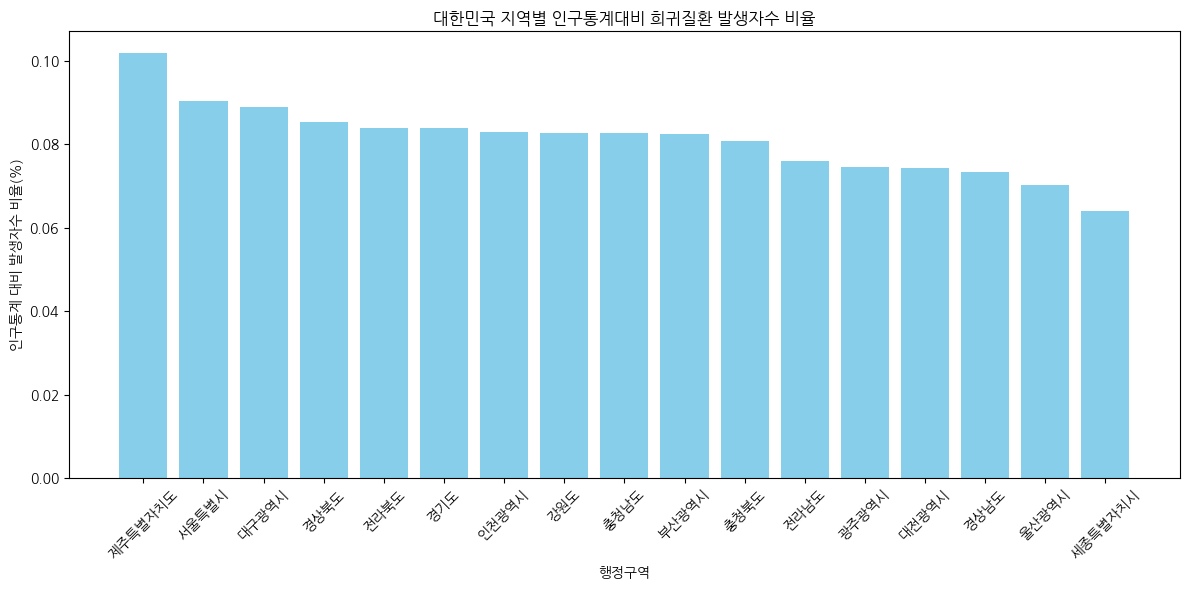

In [425]:
merged_df['인구통계 대비 발생자수 비율(%)'] = ((merged_df['발생자수'] / merged_df['소계']) * 100).round(2)
df_sorted_percent = merged_df.sort_values(by='인구통계 대비 발생자수 비율(%)', ascending=False)

# 지역별로 희귀질환 발생자수 데이터 시각화
plt.figure(figsize=(12, 6))
plt.bar(df_sorted_percent['행정구역'], df_sorted_percent['인구통계 대비 발생자수 비율(%)'], color='skyblue')
plt.title('대한민국 지역별 인구통계대비 희귀질환 발생자수 비율')
plt.xlabel('행정구역')
plt.ylabel('인구통계 대비 발생자수 비율(%)')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()
plt.show()

##### 지역별 발생자 분포 현황
- 대한민국 지역별 발생자수 1위(경기도: 11377명), 2위(서울특별시: 8601명) / 압도적
- 인구통계 대비 발생자수 1위(제주특별자치도: 0.101957%), 2위(서울특별시: 0.090447%)  / 전지역 비등비등

##### 지도 시각화

In [452]:
# geopandas 사용해서 지도에 시각화하기
!pip install geopandas

In [453]:
pip install --upgrade mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 42.0 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [454]:
import geopandas as gpd
plt.rcParams['font.family'] = 'NanumGothic'

In [467]:
KOREA = gpd.read_file('../geodata/ctprvn.shp', encoding='EUC-KR')
KOREA

,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM,geometry
0,11,Seoul,서울특별시,"POLYGON ((966987.226 1941110.946, 966987.119 1..."
1,26,Busan,부산광역시,"MULTIPOLYGON (((1148194.981 1685460.055, 11481..."
2,27,Daegu,대구광역시,"POLYGON ((1087859.999 1760097.461, 1087859.951..."
3,28,Incheon,인천광역시,"MULTIPOLYGON (((847834.755 1881816.658, 847840..."
4,29,Gwangju,광주광역시,"POLYGON ((932712.687 1696168.692, 932781.680 1..."
5,30,Daejeon,대전광역시,"POLYGON ((990946.725 1832389.260, 991057.692 1..."
6,31,Ulsan,울산광역시,"MULTIPOLYGON (((1167949.952 1710285.043, 11679..."
7,36,Sejong-si,세종특별자치시,"POLYGON ((971235.936 1844386.985, 971234.055 1..."
8,41,Gyeonggi-do,경기도,"MULTIPOLYGON (((931607.470 1894480.382, 931653..."
9,43,Chungcheongbuk-do,충청북도,"POLYGON ((1042689.435 1917662.690, 1042731.339..."


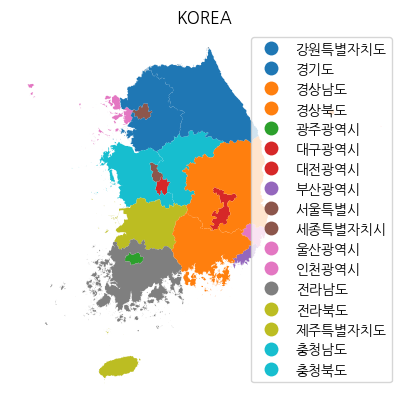

In [468]:
# 지도 시각화하여 필요한 지도 데이터가 맞는지 확인
ax = KOREA.plot(column="CTP_KOR_NM", legend=True, categorical=True)
ax.set_title("KOREA")
ax.set_axis_off()
plt.show()

In [473]:
# 시각화하고자 하는 data -> geometry data와 병합
merged_df

# 특정 column의 value 변경
merged_df.loc[merged_df['행정구역'] == '강원도', '행정구역'] = '강원특별자치도'
merged_df

,행정구역,지역구,소계,발생자수,인구통계 대비 발생자수 비율(%)
0,강원특별자치도,소계,1538492,1274,0.082808
1,경기도,소계,13565450,11377,0.083867
2,경상남도,소계,3314183,2431,0.073351
3,경상북도,소계,2626609,2243,0.085395
4,광주광역시,소계,1441611,1076,0.074639
5,대구광역시,소계,2385412,2120,0.088874
6,대전광역시,소계,1452251,1080,0.074367
7,부산광역시,소계,3350380,2762,0.082438
8,서울특별시,소계,9509458,8601,0.090447
9,세종특별자치시,소계,371895,238,0.063997


In [474]:
new_merged_df = pd.merge(KOREA, merged_df, left_on='CTP_KOR_NM', right_on='행정구역', how='left')
new_merged_df

,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM,geometry,행정구역,지역구,소계,발생자수,인구통계 대비 발생자수 비율(%)
0,11,Seoul,서울특별시,"POLYGON ((966987.226 1941110.946, 966987.119 1...",서울특별시,소계,9509458,8601,0.090447
1,26,Busan,부산광역시,"MULTIPOLYGON (((1148194.981 1685460.055, 11481...",부산광역시,소계,3350380,2762,0.082438
2,27,Daegu,대구광역시,"POLYGON ((1087859.999 1760097.461, 1087859.951...",대구광역시,소계,2385412,2120,0.088874
3,28,Incheon,인천광역시,"MULTIPOLYGON (((847834.755 1881816.658, 847840...",인천광역시,소계,2948375,2446,0.082961
4,29,Gwangju,광주광역시,"POLYGON ((932712.687 1696168.692, 932781.680 1...",광주광역시,소계,1441611,1076,0.074639
5,30,Daejeon,대전광역시,"POLYGON ((990946.725 1832389.260, 991057.692 1...",대전광역시,소계,1452251,1080,0.074367
6,31,Ulsan,울산광역시,"MULTIPOLYGON (((1167949.952 1710285.043, 11679...",울산광역시,소계,1121592,789,0.070346
7,36,Sejong-si,세종특별자치시,"POLYGON ((971235.936 1844386.985, 971234.055 1...",세종특별자치시,소계,371895,238,0.063997
8,41,Gyeonggi-do,경기도,"MULTIPOLYGON (((931607.470 1894480.382, 931653...",경기도,소계,13565450,11377,0.083867
9,43,Chungcheongbuk-do,충청북도,"POLYGON ((1042689.435 1917662.690, 1042731.339...",충청북도,소계,1597427,1291,0.080817


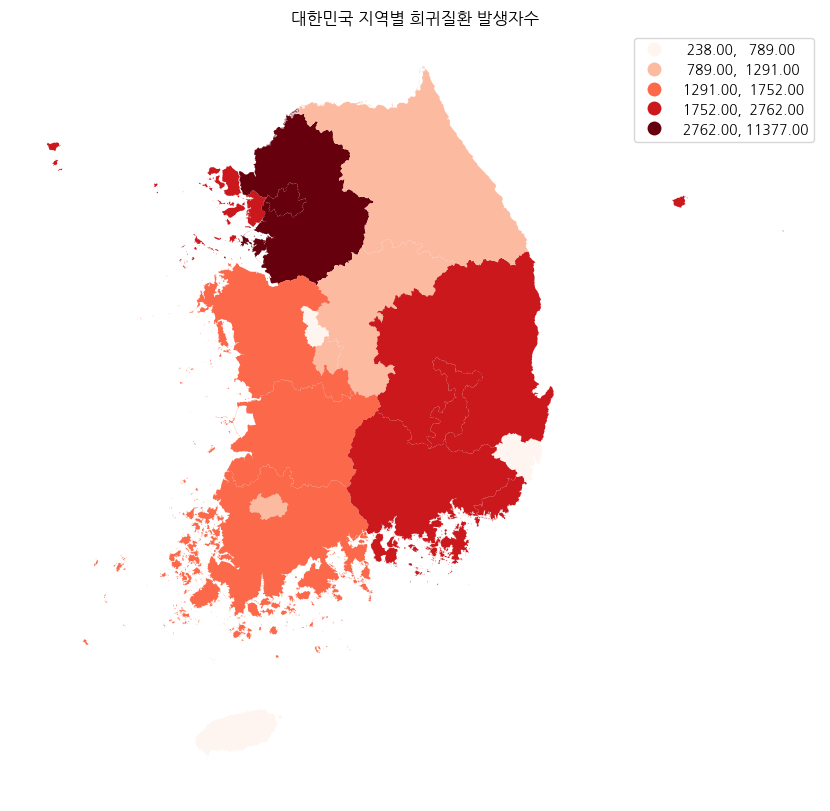

In [481]:
# 발생자수에 따라 정규화
new_merged_df['normalized'] = (new_merged_df['발생자수'] - new_merged_df['발생자수'].min()) / (new_merged_df['발생자수'].max() - new_merged_df['발생자수'].min())

# Matplotlib Figure 객체 생성
fig, ax = plt.subplots(figsize=(12, 10))  # 크기를 조정하여 지도를 키웁니다.


# 지도 시각화
new_merged_df.plot(ax=ax, column="발생자수", legend=True, scheme='jenkscaspall', cmap="Reds", k=5)
ax.set_title("대한민국 지역별 희귀질환 발생자수")
ax.axis('off')  # 축을 가리기 위해 축의 가시성을 비활성화합니다.
plt.show()

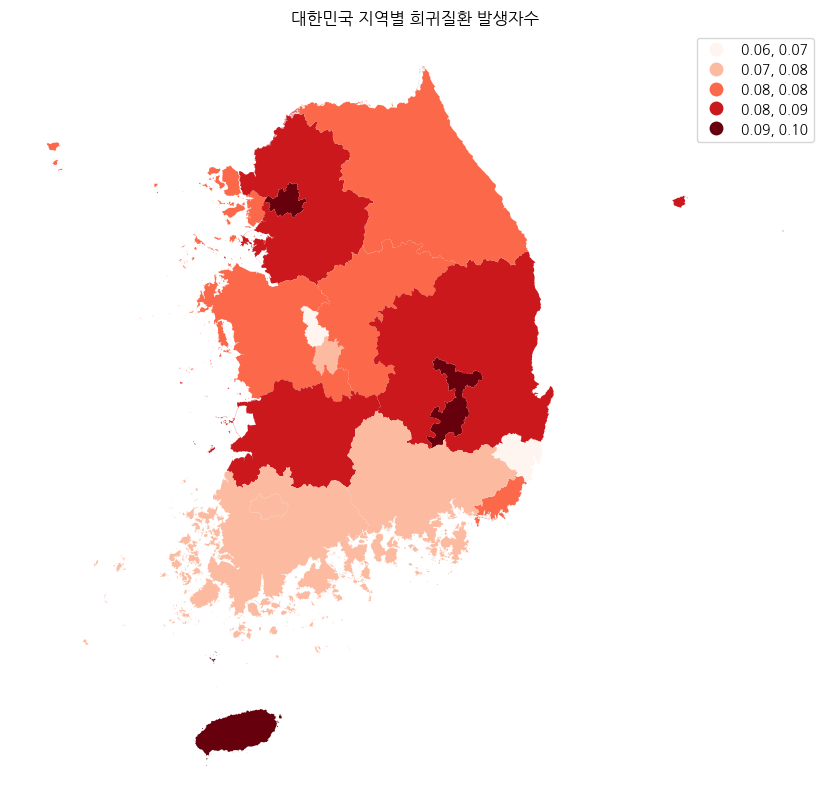

In [483]:
# 인구통계 대비 발생 비율 지도 시각화
new_merged_df['normalized_percent'] = (new_merged_df['인구통계 대비 발생자수 비율(%)'] - new_merged_df['인구통계 대비 발생자수 비율(%)'].min()) / (new_merged_df['인구통계 대비 발생자수 비율(%)'].max() - new_merged_df['인구통계 대비 발생자수 비율(%)'].min())

# Matplotlib Figure 객체 생성
fig, ax = plt.subplots(figsize=(12, 10))  # 크기를 조정하여 지도를 키웁니다.


# 지도 시각화
new_merged_df.plot(ax=ax, column="인구통계 대비 발생자수 비율(%)", legend=True, scheme='jenkscaspall', cmap="Reds", k=5)
ax.set_title("대한민국 지역별 희귀질환 발생자수")
ax.axis('off')  # 축을 가리기 위해 축의 가시성을 비활성화합니다.
plt.show()

##### 발생자 분포 최대 지역(서울특별시)의 질병코드별 발생 정도 비교

In [488]:
df_region_accrual.head()

,질병코드,질병명,발생자 수,서울특별시,인천광역시,경기도,강원도,충청남도,충청북도,대전광역시,...,경상남도,경상북도,부산광역시,대구광역시,울산광역시,전라북도,전라남도,광주광역시,제주특별자치도,알수없음
0,계,NaN,43079,8601,2446,11377,1274,1752,1291,1080,...,2431,2243,2762,2120,789,1501,1392,1076,690,16
1,D61.3,특발성 무형성빈혈,406,73,29,101,20,17,9,12,...,24,19,15,22,6,6,20,20,9,1
2,D61.9,저형성빈혈 NOS,223,47,34,56,4,9,2,1,...,21,7,15,11,4,6,2,1,1,0
3,D68.6,항인지질증후군,469,126,27,121,12,20,3,10,...,11,30,13,37,4,13,13,14,14,0
4,D86.0,폐의 사르코이드증,319,79,24,96,5,14,10,4,...,11,12,15,13,5,6,12,9,3,0


In [491]:
# 서울특별시 발생자만 추출
df_seoul_accrual = df_region_accrual[['질병코드', '질병명', '발생자 수', '서울특별시']]
df_seoul_accrual

,질병코드,질병명,발생자 수,서울특별시
0,계,NaN,43079,8601
1,D61.3,특발성 무형성빈혈,406,73
2,D61.9,저형성빈혈 NOS,223,47
3,D68.6,항인지질증후군,469,126
4,D86.0,폐의 사르코이드증,319,79
5,E27.4,부신피질부전 NOS,618,75
6,F01.1,카다실,276,43
7,G11.2,만기발병 소뇌성 운동실조(발병은 보통 20세 이후),440,62
8,G11.9,상세불명의 유전성 운동실조,269,89
9,G12.2,"운동신경세포병(단, 기타 및 상세불명의 운동신경세포병(G12.28)은 제외)",889,171


In [493]:
df_seoul_accrual['질환항목분류'] = df_seoul_accrual['질병코드'].str[0]
df_seoul_accrual

/tmp/ipykernel_373/1072979044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul_accrual['질환항목분류'] = df_seoul_accrual['질병코드'].str[0]


,질병코드,질병명,발생자 수,서울특별시,질환항목분류
0,계,NaN,43079,8601,계
1,D61.3,특발성 무형성빈혈,406,73,D
2,D61.9,저형성빈혈 NOS,223,47,D
3,D68.6,항인지질증후군,469,126,D
4,D86.0,폐의 사르코이드증,319,79,D
5,E27.4,부신피질부전 NOS,618,75,E
6,F01.1,카다실,276,43,F
7,G11.2,만기발병 소뇌성 운동실조(발병은 보통 20세 이후),440,62,G
8,G11.9,상세불명의 유전성 운동실조,269,89,G
9,G12.2,"운동신경세포병(단, 기타 및 상세불명의 운동신경세포병(G12.28)은 제외)",889,171,G


###### 질환항목분류별 전체 발생자 수 비율

In [500]:
# 질환항목분류를 기준으로 groupby하여 count
grouped = df_seoul_accrual.groupby('질환항목분류')['발생자 수'].sum().reset_index()
grouped

,질환항목분류,발생자 수
0,D,1417
1,E,618
2,F,276
3,G,6891
4,H,2593
5,I,7904
6,J,4450
7,K,6105
8,L,682
9,M,8767


In [529]:
diseases_list = pd.read_csv('../../New_csv(데이터전처리 완료된 csv)/희귀질환정보_항목분류.csv')
diseases_list

,항목분류,질환코드,코드시작,코드끝
0,특정감염성,A,0,99
1,특정감염성,B,0,99
2,신생물,C,0,99
3,신생물,D,0,48
4,혈액조혈기관,D,50,89
5,"내분비,영양",E,0,99
6,정신및행동,F,0,99
7,신경계통질환,G,0,99
8,눈및부속기관,H,0,99
9,순환기계통,I,0,99


In [530]:
diseases_list.rename(columns={'질환코드': '질환항목분류'}, inplace=True)
diseases_list

,항목분류,질환항목분류,코드시작,코드끝
0,특정감염성,A,0,99
1,특정감염성,B,0,99
2,신생물,C,0,99
3,신생물,D,0,48
4,혈액조혈기관,D,50,89
5,"내분비,영양",E,0,99
6,정신및행동,F,0,99
7,신경계통질환,G,0,99
8,눈및부속기관,H,0,99
9,순환기계통,I,0,99


In [531]:
# 질환황목분류 D행 합치기
diseases_list.drop(diseases_list.index[3], inplace=True)
diseases_list.iloc[3, diseases_list.columns.get_loc('항목분류')] = '신생물/혈액조혈기관'
diseases_list

,항목분류,질환항목분류,코드시작,코드끝
0,특정감염성,A,0,99
1,특정감염성,B,0,99
2,신생물,C,0,99
4,신생물/혈액조혈기관,D,50,89
5,"내분비,영양",E,0,99
6,정신및행동,F,0,99
7,신경계통질환,G,0,99
8,눈및부속기관,H,0,99
9,순환기계통,I,0,99
10,호흡기계통,J,0,99


In [532]:
# Left Join
merged_df = pd.merge(grouped, diseases_list, on='질환항목분류', how='left')

merged_df

,질환항목분류,발생자 수,항목분류,코드시작,코드끝
0,D,1417,신생물/혈액조혈기관,50.0,89.0
1,E,618,"내분비,영양",0.0,99.0
2,F,276,정신및행동,0.0,99.0
3,G,6891,신경계통질환,0.0,99.0
4,H,2593,눈및부속기관,0.0,99.0
5,I,7904,순환기계통,0.0,99.0
6,J,4450,호흡기계통,0.0,99.0
7,K,6105,소화기계통,0.0,99.0
8,L,682,피부및조직,0.0,99.0
9,M,8767,근육골격계통,0.0,99.0


In [534]:
merged_df['항목분류'].fillna('알수없음', inplace=True)
merged_df

/tmp/ipykernel_373/3547668691.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['항목분류'].fillna('알수없음', inplace=True)


,질환항목분류,발생자 수,항목분류,코드시작,코드끝
0,D,1417,신생물/혈액조혈기관,50.0,89.0
1,E,618,"내분비,영양",0.0,99.0
2,F,276,정신및행동,0.0,99.0
3,G,6891,신경계통질환,0.0,99.0
4,H,2593,눈및부속기관,0.0,99.0
5,I,7904,순환기계통,0.0,99.0
6,J,4450,호흡기계통,0.0,99.0
7,K,6105,소화기계통,0.0,99.0
8,L,682,피부및조직,0.0,99.0
9,M,8767,근육골격계통,0.0,99.0


In [565]:
new_merged_df = merged_df[:-1]
new_merged_df_sort = new_merged_df.sort_values('발생자 수', ascending=False)
new_merged_df_sort

,질환항목분류,발생자 수,항목분류,코드시작,코드끝
9,M,8767,근육골격계통,0.0,99.0
5,I,7904,순환기계통,0.0,99.0
3,G,6891,신경계통질환,0.0,99.0
7,K,6105,소화기계통,0.0,99.0
6,J,4450,호흡기계통,0.0,99.0
10,Q,2950,선천기형변형,0.0,99.0
4,H,2593,눈및부속기관,0.0,99.0
0,D,1417,신생물/혈액조혈기관,50.0,89.0
8,L,682,피부및조직,0.0,99.0
1,E,618,"내분비,영양",0.0,99.0


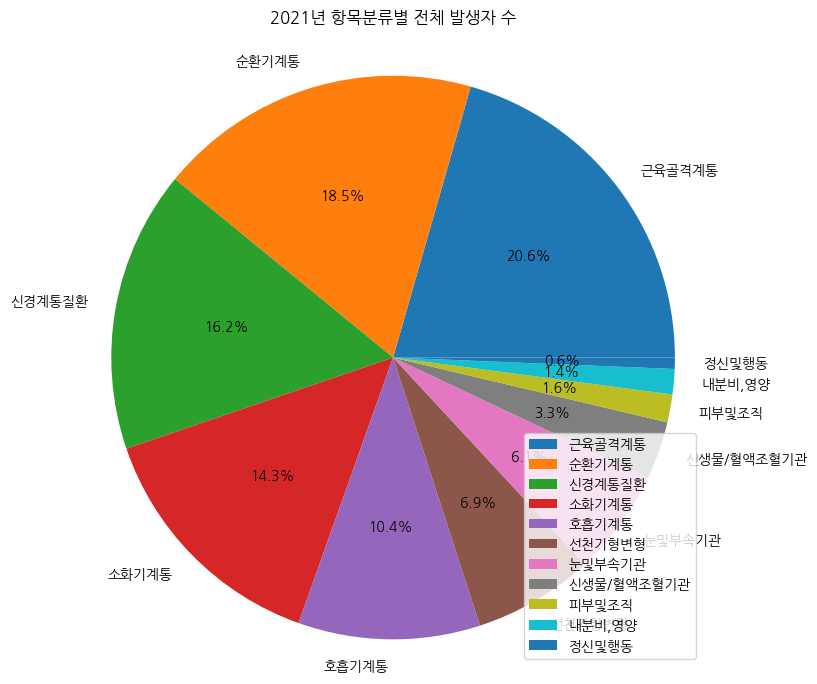

In [566]:
# 파이차트 그리기
plt.figure(figsize=(8, 8))
pie = plt.pie(new_merged_df_sort['발생자 수'], labels=new_merged_df_sort['항목분류'], autopct='%1.1f%%')
plt.legend(pie[0], new_merged_df_sort['항목분류'], loc="lower right", bbox_to_anchor=(1.0, 0.0))
plt.axis('equal')
plt.title('2021년 항목분류별 전체 발생자 수\n')
plt.show()

###### 질환항목분류별 서울특별시 발생자 수 비율

In [550]:
# 질환항목분류를 기준으로 서울특별시 발생자 수 groupby하여 count
grouped_seoul = df_seoul_accrual.groupby('질환항목분류')['서울특별시'].sum().reset_index()
grouped_seoul

,질환항목분류,서울특별시
0,D,325
1,E,75
2,F,43
3,G,1509
4,H,564
5,I,1386
6,J,770
7,K,1207
8,L,133
9,M,1812


In [560]:
# Left Join
seoul_merged_df = pd.merge(grouped_seoul, diseases_list, on='질환항목분류', how='left')

seoul_merged_df = seoul_merged_df[:-1]
seoul_merged_df_sorted = seoul_merged_df.sort_values('서울특별시', ascending=False)
seoul_merged_df_sorted

,질환항목분류,서울특별시,항목분류,코드시작,코드끝
9,M,1812,근육골격계통,0.0,99.0
3,G,1509,신경계통질환,0.0,99.0
5,I,1386,순환기계통,0.0,99.0
7,K,1207,소화기계통,0.0,99.0
6,J,770,호흡기계통,0.0,99.0
10,Q,670,선천기형변형,0.0,99.0
4,H,564,눈및부속기관,0.0,99.0
0,D,325,신생물/혈액조혈기관,50.0,89.0
8,L,133,피부및조직,0.0,99.0
1,E,75,"내분비,영양",0.0,99.0


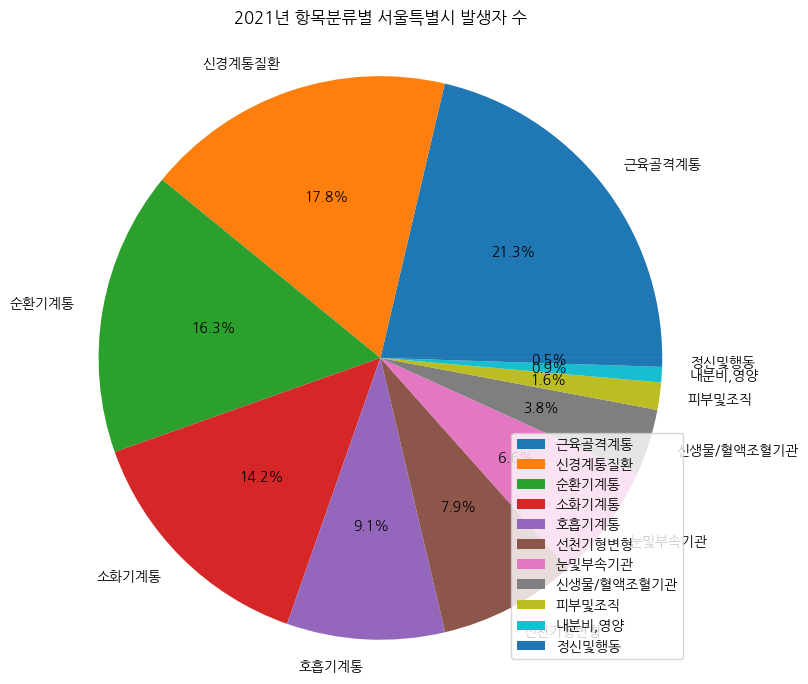

In [561]:
# 파이차트 그리기
plt.figure(figsize=(8, 8))
pie = plt.pie(seoul_merged_df_sorted['서울특별시'], labels=seoul_merged_df_sorted['항목분류'], autopct='%1.1f%%')
plt.legend(pie[0], seoul_merged_df_sorted['항목분류'], loc="lower right", bbox_to_anchor=(1.0, 0.0))
plt.axis('equal')
plt.title('2021년 항목분류별 서울특별시 발생자 수\n')
plt.show()

##### 발생자 분포 최대 지역(서울특별시)의 질병코드별 발생 정도 비교
- 항목분류별 전체 발생자수 Rank 3 & 비율
  1) 근육골격계통 20.6%
  2) 순환기계통 18.5%
  3) 신경계통질환 16.2%	
- 항목분류별 서울특별시 발생자수 Rank 3 & 비율
  1) 근육골격계통 21.3%
  2) 신경계통질환 17.8%
  3) 순환기계통 16.3%